# IA e ML
  

### Criar série temporal, modelo Alisamento exponencial Holt-Winters

#### links:
Pandas To Datetime - String to Date - pd.to_datetime() - Data Independent
Python strptime() - string to datetime object (programiz.com)
How to Work With Dates in Python. Parsing, formatting, time zones, and… | by David Mezzetti | Better Programming | Medium




## Importar Pacotes

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime

## Importar os dados

In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
bike = pd.read_csv(r'Bike_Sharing_day.csv', ",")


/tmp/ipykernel_22187/4140555764.py:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  bike = pd.read_csv(r'Bike_Sharing_day.csv', ",")


In [4]:
bike.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
print (bike.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Manter as variáveis data e cnt

In [7]:
del bike['instant'], bike['season'], bike['yr'], bike['mnth'], bike['holiday'], bike['weekday'], bike['workingday'], bike['weathersit'], bike['temp'], bike['atemp'], bike['hum'], bike['windspeed'], bike['casual'], bike['registered']


In [8]:
bike.head()

,dteday,cnt
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600


In [9]:
bike.index

RangeIndex(start=0, stop=731, step=1)

In [10]:
print (bike.dtypes)

dteday    object
cnt        int64
dtype: object


## Mudar o formato da variável "dteday" para data

In [11]:
bike['dteday'] = pd.to_datetime(bike['dteday'], format='%Y-%m-%d')
bike.head()

,dteday,cnt
0,2011-01-01,985
1,2011-01-02,801
2,2011-01-03,1349
3,2011-01-04,1562
4,2011-01-05,1600


In [12]:
print (bike.dtypes)

dteday    datetime64[ns]
cnt                int64
dtype: object


In [13]:
bike.dteday.describe()

/tmp/ipykernel_22187/3260238274.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  bike.dteday.describe()


count                     731
unique                    731
top       2011-01-01 00:00:00
freq                        1
first     2011-01-01 00:00:00
last      2012-12-31 00:00:00
Name: dteday, dtype: object

In [14]:
bike.set_index("dteday", inplace=True)

In [15]:
print (bike.dtypes)

cnt    int64
dtype: object


In [16]:
bike.head()

,cnt
dteday,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600


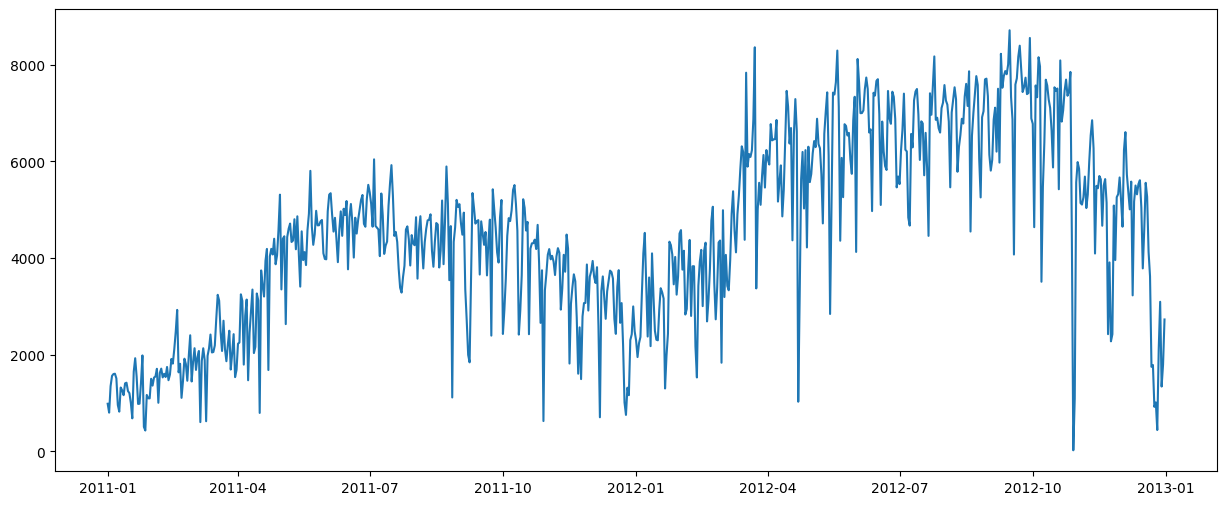

In [17]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.plot(bike)

# Importar o Pacote statsmodels

In [18]:
from statsmodels.tsa.api import Holt

## Modelo Alisamento Exponencial Holt Winters
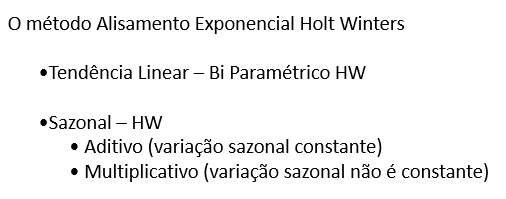
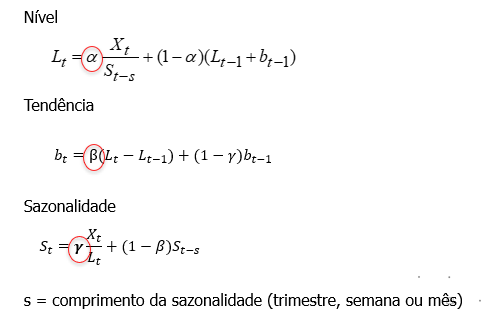




In [24]:
# time series - statsmodels 
# Seasonality decomposition

from statsmodels.tsa.seasonal import seasonal_decompose
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   

from statsmodels.tsa.holtwinters import ExponentialSmoothing 
#statsmodels.tsa.holtwinters.ExponentialSmoothing

fit1 = ExponentialSmoothing(bike, seasonal_periods=12, trend='additive', seasonal='additive', use_boxcox=True).fit()

/home/alison/Documents/FIAP/conceitos_ia/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='dteday'>

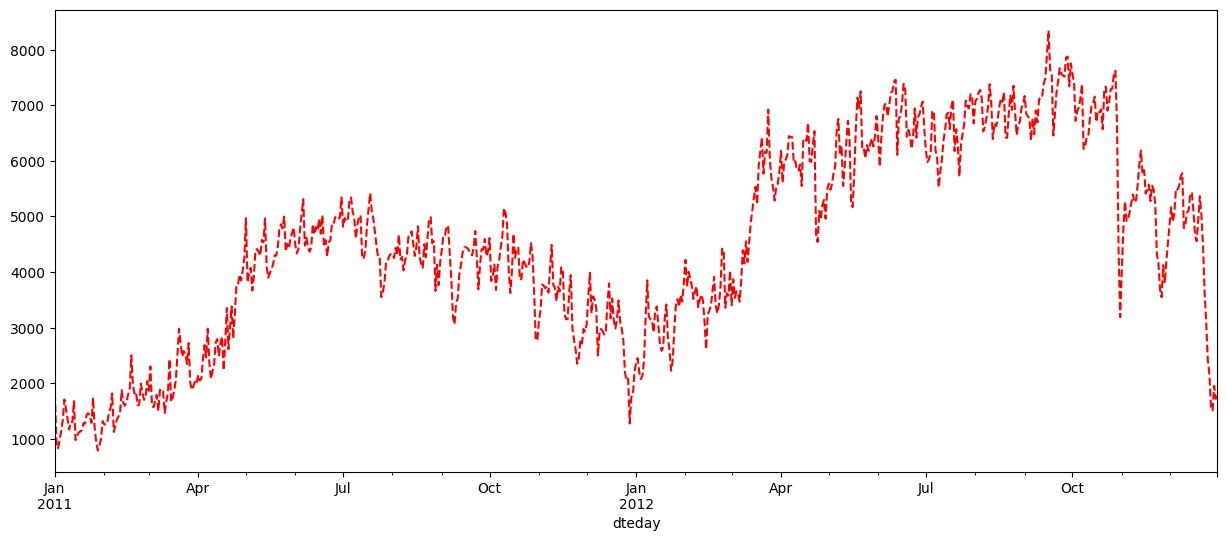

In [25]:
fit1.fittedvalues.plot(style='--', color='red')

/home/alison/Documents/FIAP/conceitos_ia/venv/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='dteday'>

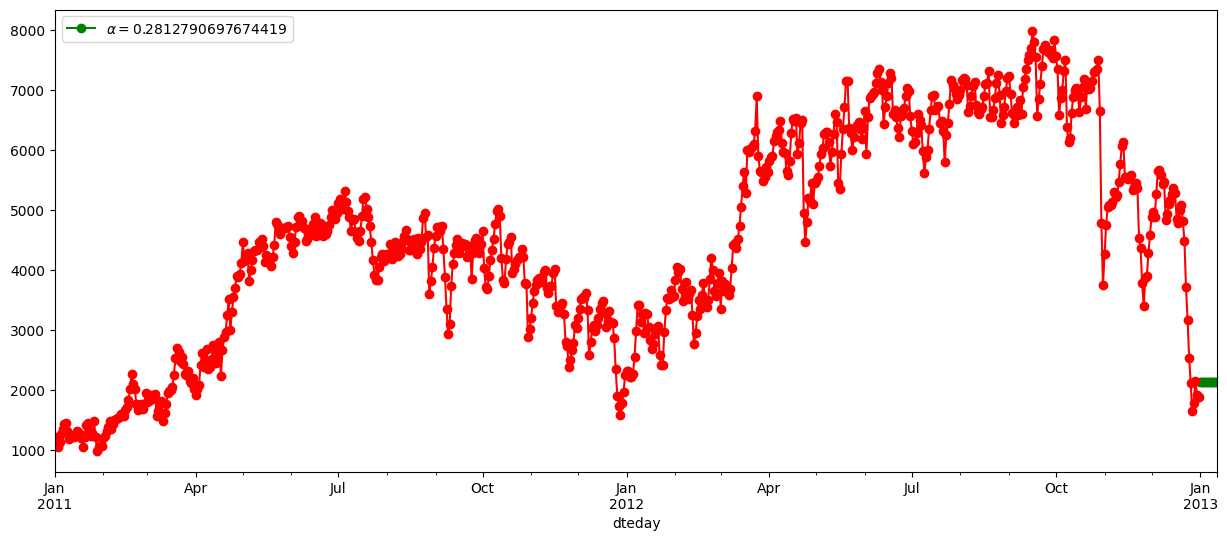

In [26]:
Modelo2 = ExponentialSmoothing(bike).fit()
previsao2 = Modelo2.forecast(12).rename(r'$\alpha=%s$'%Modelo2.model.params['smoothing_level'])
# plot
previsao2.plot(marker='o', color='green', legend=True)
Modelo2.fittedvalues.plot(marker='o', color='red')

<AxesSubplot:>

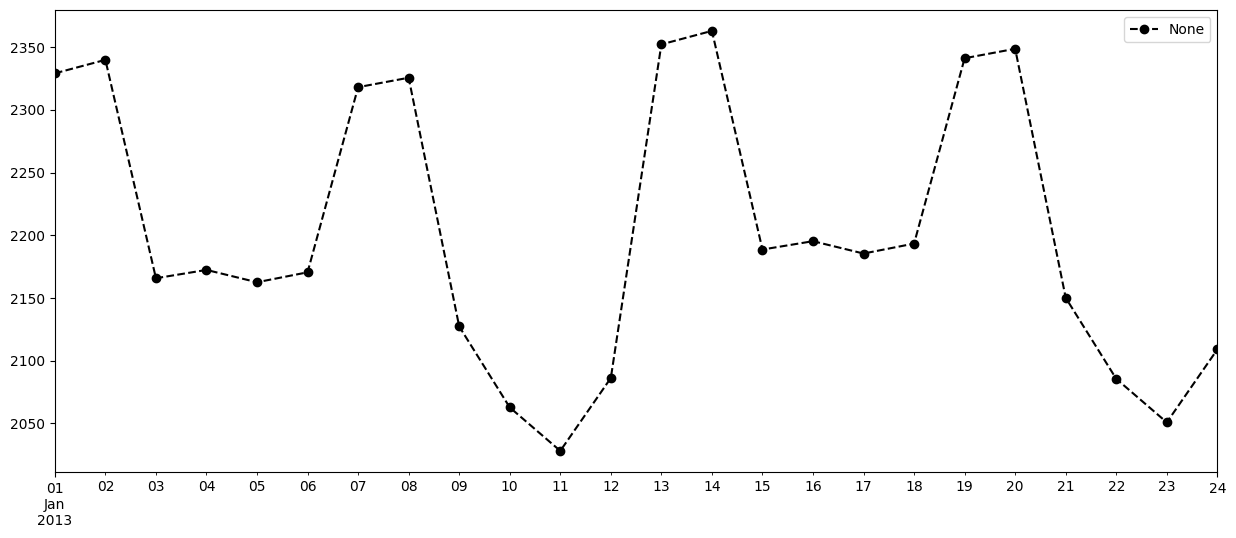

In [27]:
fit1.forecast(24).plot(style='--', marker='o', color='black', legend=True)

<AxesSubplot:xlabel='dteday'>

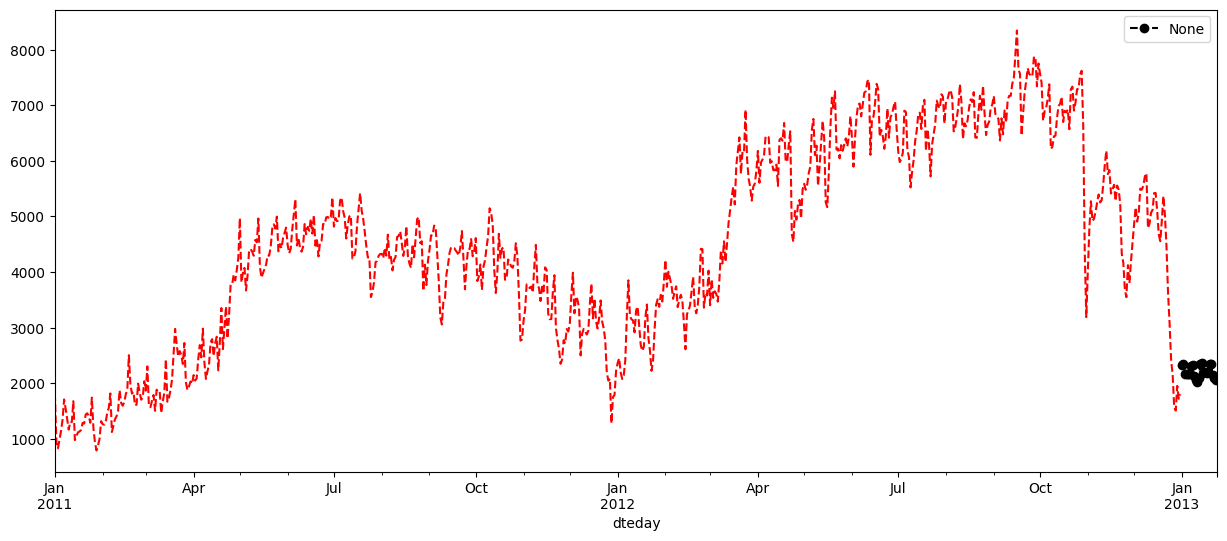

In [28]:
fit1.fittedvalues.plot(style='--', color='red')
fit1.forecast(24).plot(style='--', marker='o', color='black', legend=True)